In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kaggle

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [4]:
!kaggle datasets download -d mczielinski/bitcoin-historical-data

 99% 99.0M/100M [00:05<00:00, 23.9MB/s]
100% 100M/100M [00:05<00:00, 20.5MB/s] 


In [5]:
import zipfile

file_path = '/content/bitcoin-historical-data.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Datasets/Crypto')  # Replace 'destination_folder' with your desired folder

In [6]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Crypto/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [9]:
import matplotlib.pyplot as plt

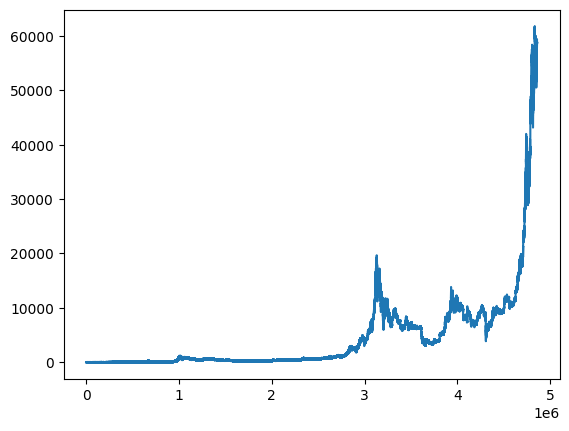

In [10]:
plt.plot(df['Weighted_Price'])

In [11]:
import datetime

def unix_to_normal(unix_timestamp):
  return datetime.datetime.utcfromtimestamp(unix_timestamp)

df['Timestamp'] = df['Timestamp'].apply(unix_to_normal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          datetime64[ns]
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 296.5 MB


In [12]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [13]:
df.set_index('Timestamp', inplace=True)

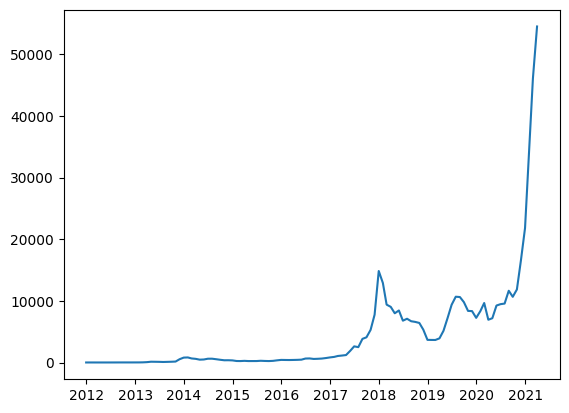

In [14]:
plt.plot(df.resample('M').mean()['Weighted_Price'])

In [15]:
hourly = df.resample('H').mean()
hourly[hourly['Weighted_Price'].isna()]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2015-01-09 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-25 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-25 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
hourly.dropna(inplace = True)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
hourly['Weighted_Price'] = scaler.fit_transform(hourly[['Weighted_Price']])

In [18]:
train, test = train_test_split(hourly['Weighted_Price'],test_size=.2,shuffle=False)

In [19]:
train

Timestamp
2011-12-31 07:00:00    0.000004
2011-12-31 15:00:00    0.000004
2011-12-31 16:00:00    0.000006
2011-12-31 17:00:00    0.000007
2012-01-01 04:00:00    0.000007
                         ...   
2019-06-23 13:00:00    0.173026
2019-06-23 14:00:00    0.173986
2019-06-23 15:00:00    0.174400
2019-06-23 16:00:00    0.174322
2019-06-23 17:00:00    0.174401
Name: Weighted_Price, Length: 62027, dtype: float64

In [20]:
print(len(test))
print(len(train))
print(len(test)/len(train))

15507
62027
0.25000403050284553


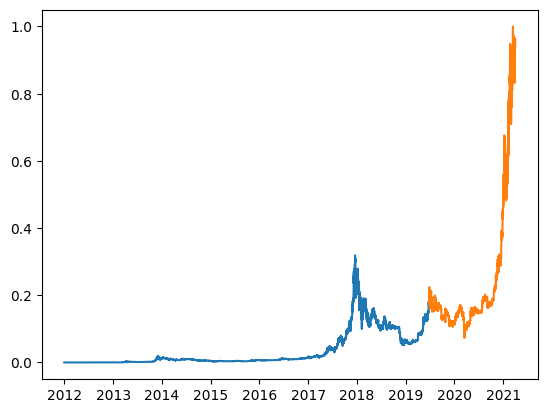

In [21]:
plt.plot(train)
plt.plot(test)

In [22]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [23]:
train_set = windowed_dataset(train, window_size=100, batch_size=250, shuffle_buffer=1000)
test_set  = windowed_dataset(test, window_size=100, batch_size=250, shuffle_buffer=1000)

In [24]:
threshold_mae = (hourly['Weighted_Price'].max() - hourly['Weighted_Price'].min()) * 10/100
print(threshold_mae)

0.1


In [25]:
checkpoint = ModelCheckpoint('Bitcoin.h5', save_best_only=True, monitor='val_mae', mode='min', verbose= 5)
early_stopping= EarlyStopping(monitor='val_loss', patience = 15, restore_best_weights=True)

In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.LSTM(32),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.Huber(),
              optimizer= tf.keras.optimizers.SGD(learning_rate = 0.005, momentum = 0.8),
              metrics=["mae"])

In [27]:
history = model.fit(train_set,
                    validation_data = test_set,
                    epochs= 300,
                    callbacks = [checkpoint, early_stopping],
                    verbose = 2)

Epoch 1/300

Epoch 1: val_mae improved from inf to 0.15090, saving model to Bitcoin.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


248/248 - 76s - loss: 5.2543e-04 - mae: 0.0142 - val_loss: 0.0305 - val_mae: 0.1509 - 76s/epoch - 305ms/step
Epoch 2/300

Epoch 2: val_mae improved from 0.15090 to 0.14540, saving model to Bitcoin.h5
248/248 - 69s - loss: 6.3662e-04 - mae: 0.0200 - val_loss: 0.0292 - val_mae: 0.1454 - 69s/epoch - 278ms/step
Epoch 3/300

Epoch 3: val_mae improved from 0.14540 to 0.14315, saving model to Bitcoin.h5
248/248 - 67s - loss: 5.9755e-04 - mae: 0.0197 - val_loss: 0.0286 - val_mae: 0.1432 - 67s/epoch - 272ms/step
Epoch 4/300

Epoch 4: val_mae improved from 0.14315 to 0.14147, saving model to Bitcoin.h5
248/248 - 70s - loss: 5.7321e-04 - mae: 0.0194 - val_loss: 0.0280 - val_mae: 0.1415 - 70s/epoch - 284ms/step
Epoch 5/300

Epoch 5: val_mae improved from 0.14147 to 0.14044, saving model to Bitcoin.h5
248/248 - 76s - loss: 5.5833e-04 - mae: 0.0192 - val_loss: 0.0276 - val_mae: 0.1404 - 76s/epoch - 307ms/step
Epoch 6/300

Epoch 6: val_mae improved from 0.14044 to 0.13914, saving model to Bitcoin.h5


Text(0.5, 1.0, 'loss')

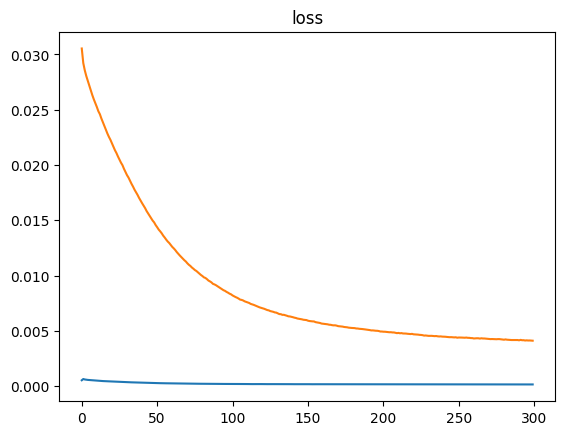

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')

Text(0.5, 1.0, 'mae')

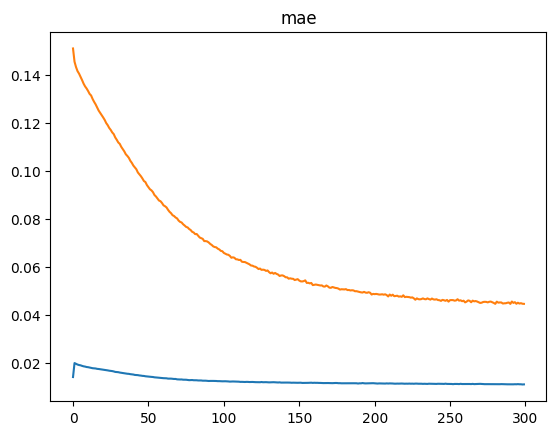

In [29]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('mae')

In [30]:
model = tf.keras.models.load_model('Bitcoin.h5')
model.evaluate(test_set)

62/62 [==============================] - 9s 116ms/step - loss: 0.0041 - mae: 0.0446


[0.004141134675592184, 0.04463370144367218]

In [31]:
hourly

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:00:00,4.390000,4.390000,4.390000,4.390000,0.455581,2.000000,0.000004
2011-12-31 15:00:00,4.390000,4.390000,4.390000,4.390000,48.000000,210.720000,0.000004
2011-12-31 16:00:00,4.500000,4.570000,4.500000,4.570000,37.862297,171.380338,0.000006
2011-12-31 17:00:00,4.580000,4.580000,4.580000,4.580000,9.000000,41.220000,0.000007
2012-01-01 04:00:00,4.580000,4.580000,4.580000,4.580000,1.502000,6.879160,0.000007
...,...,...,...,...,...,...,...
2021-03-30 20:00:00,58686.619500,58717.499833,58649.440333,58678.720333,1.976271,116009.666363,0.956303
2021-03-30 21:00:00,58703.792500,58718.812833,58688.192000,58709.001000,0.960084,56335.721540,0.956673
2021-03-30 22:00:00,58788.743667,58806.029333,58770.925667,58788.207333,1.133653,66663.661684,0.958032


In [33]:
prediction  = windowed_dataset(hourly['Weighted_Price'], window_size=60, batch_size=100, shuffle_buffer=1000)

In [34]:
pred = model.predict(prediction)

775/775 [==============================] - 49s 61ms/step


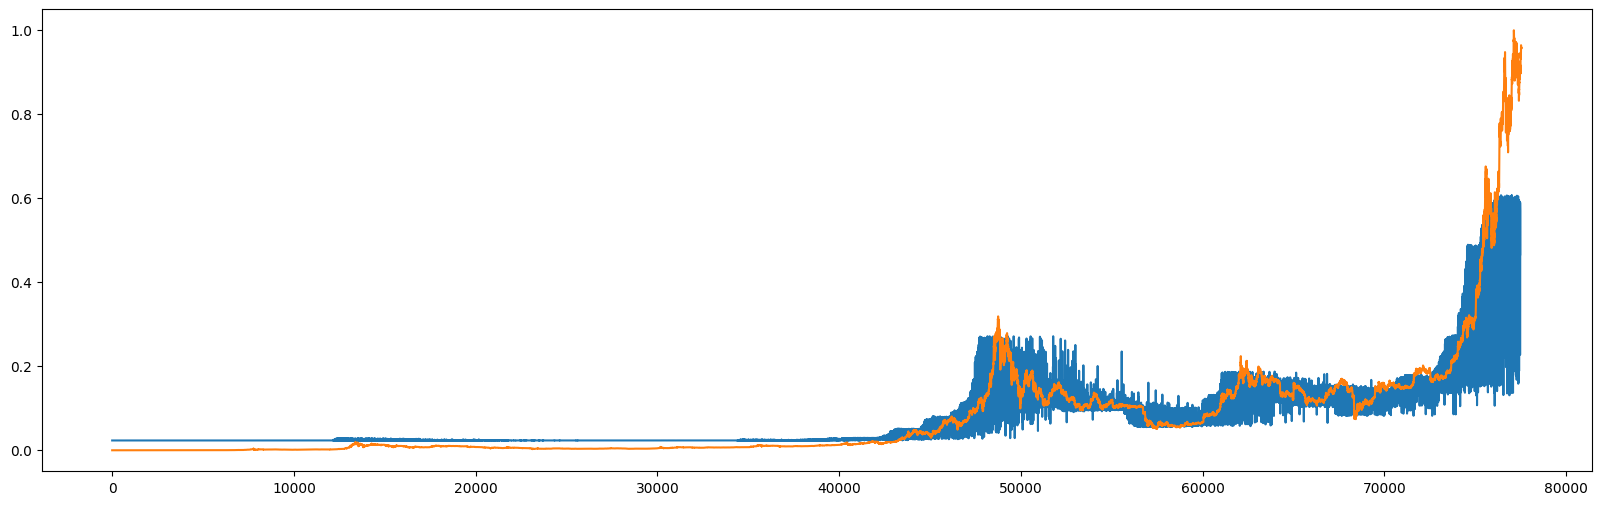

In [55]:
plt.figure(figsize=(20, 6))
plt.plot(pred)
plt.plot(hourly['Weighted_Price'].values)

plt.show()